In [1]:
import sys
sys.path.insert(0, '..')
from visualization import test_classification_separation, plot_k_series_with_shaps

In [2]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
df = pd.read_csv('../data/sin_synth/SIN_RANDY_NONOISE_500.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,176.107856,-38.292281,-83.633367,-130.510875,45.917780,-198.701307,27.789212,-14.355077,32.489286,38.293906,...,8.267257,115.987310,-16.361367,-16.296124,-0.519341,57.189860,-62.385178,163.477655,0.593159,0.0
1,100.961410,114.652989,16.501596,122.400534,269.075282,-11.194462,137.764530,-120.118107,-106.206571,236.171774,...,1.452680,-64.936704,-53.720485,10.504204,-19.586896,50.286487,-69.378273,127.678153,0.460127,0.0
2,-34.271320,48.175821,107.899320,-52.795608,30.277780,-41.432483,34.452543,6.573040,-63.255035,14.422148,...,-47.087189,110.905690,-39.843555,-41.198753,25.415166,23.234761,158.668992,-177.656889,0.377501,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.700083
std        0.210911
min        0.200191
25%        0.500853
50%        0.767173
75%        0.898267
max        0.996475
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
#X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
X = df.drop(columns=['label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import logloss_fitness

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
args = {
    "dist_function": "original",
    "fitness": logloss_fitness,
    "apply_differencing": True,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x7c9263791048>,
 'dist_func_returns': False,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False, return_info=False, shaps=None)>,
 'apply_differencing': True,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, too

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-0.0928		-8e-06	1.4407
2		-0.0193		-5e-06	2.0221
3		-0.0035		-2e-06	2.4392
4		-0.0		-2e-06	2.1619
5		-0.0		-2e-06	2.424
6		-0.0		-2e-06	2.2737
7		-0.0		-2e-06	2.344
8		-0.0		-2e-06	2.8086
9		-0.0		-2e-06	2.4562
10		-0.0		-1e-06	2.6062
11		-0.0		-1e-06	2.5835
12		-0.0		-1e-06	2.9446
13		-0.0		-1e-06	2.849
14		-0.0		-1e-06	2.9226
15		-0.0		-1e-06	2.9036
16		-0.0		-1e-06	3.2497
17		-0.0		-1e-06	3.545
18		-0.0		-1e-06	3.418
19		-0.0		-1e-06	3.4823
20		-0.0		-1e-06	3.598
21		-0.0		-1e-06	3.0637
22		-0.0		-1e-06	3.0548
23		-0.0		-1e-06	3.2218
24		-0.0		-1e-06	4.0186
25		-0.0		-1e-06	4.8477
26		-0.0		-1e-06	5.4291
27		-0.0		-1e-06	5.2523
28		-0.0		-1e-06	5.8194
29		-0.0		-1e-06	5.1471
30		-0.0		-0.0	5.5732
31		-0.0		-0.0	5.4197
32		-0.0		-0.0	5.8283
33		-0.0		-0.0	5.4199
34		-0.0		-0.0	5.5945
35		-0.0		-0.0	5.7026
36		-0.0		-0.0	6.3192
37		-0.0		-0.0	7.5232
38		-0.0		-0.0	7.0733
39		-0.0		-0.0	7.1105
40		-0.0		-0.0	6.3415
41		-0.0		-0.0	8.329
42		-0.0		-0.0	8.2465
43		-0

In [14]:
%%time
distances = gendis.transform(X)
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 8.47 s, sys: 4.5 ms, total: 8.47 s
Wall time: 8.47 s


In [15]:
distances['label'] = df['label']

Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


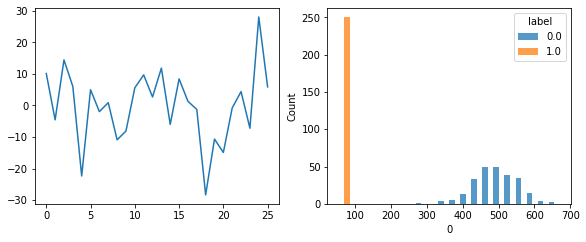

Testing separation for shapelet 1
Accuracy = 1.0
[[200   0]
 [  0 200]]


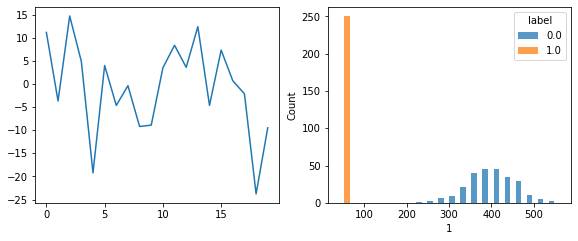

Testing separation for shapelet 2
Accuracy = 0.9975
[[199   1]
 [  0 200]]


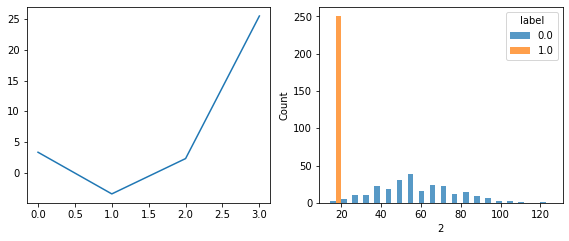

Testing separation for shapelet 3
Accuracy = 1.0
[[200   0]
 [  0 200]]


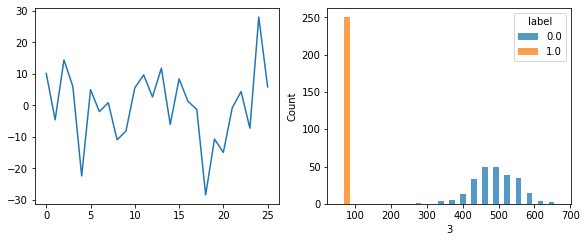

Testing separation for shapelet 4
Accuracy = 1.0
[[200   0]
 [  0 200]]


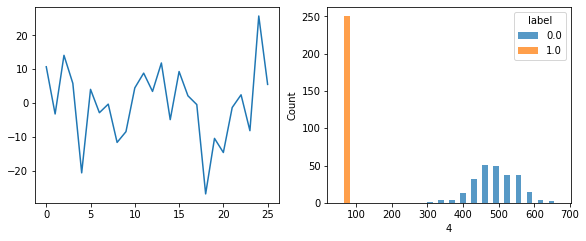

Testing separation for shapelet 5
Accuracy = 1.0
[[200   0]
 [  0 200]]


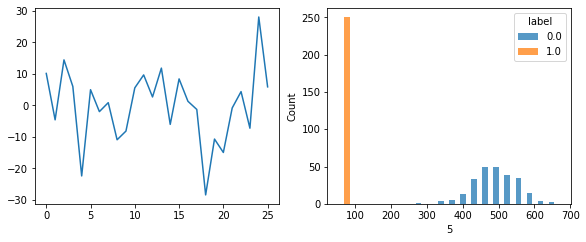

Testing separation for shapelet 6
Accuracy = 1.0
[[200   0]
 [  0 200]]


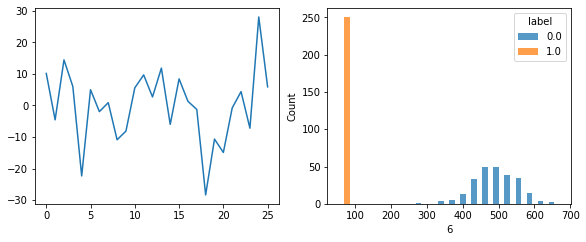

Testing separation for shapelet 7
Accuracy = 1.0
[[200   0]
 [  0 200]]


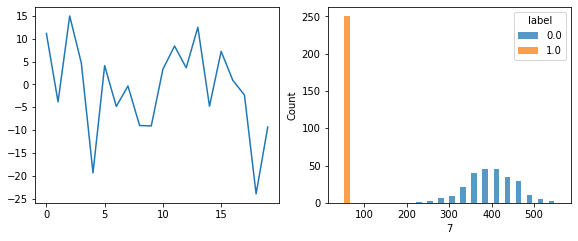

Testing separation for shapelet 8
Accuracy = 1.0
[[200   0]
 [  0 200]]


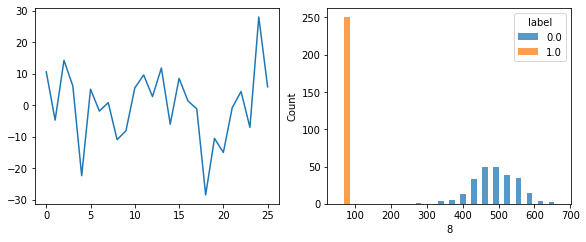

Testing separation for shapelet 9
Accuracy = 0.975
[[190  10]
 [  0 200]]


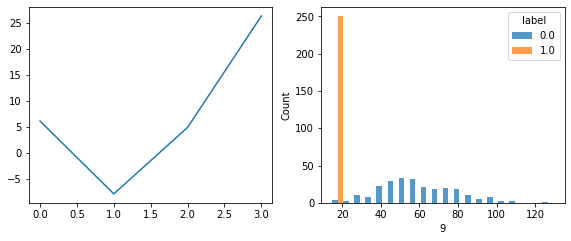

Testing separation for shapelet 10
Accuracy = 0.9975
[[199   1]
 [  0 200]]


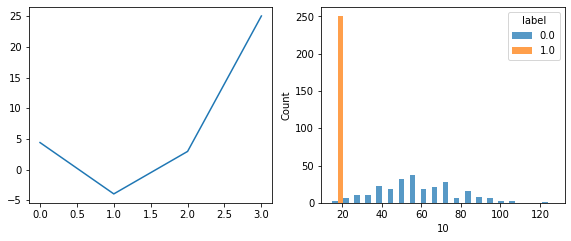

Testing separation for shapelet 11
Accuracy = 1.0
[[200   0]
 [  0 200]]


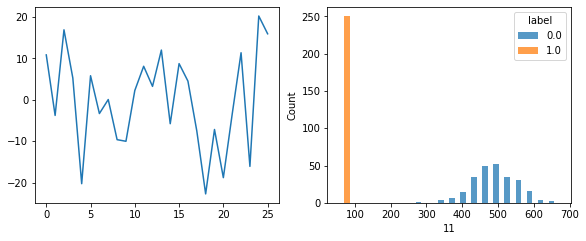

Testing separation for shapelet 12
Accuracy = 1.0
[[200   0]
 [  0 200]]


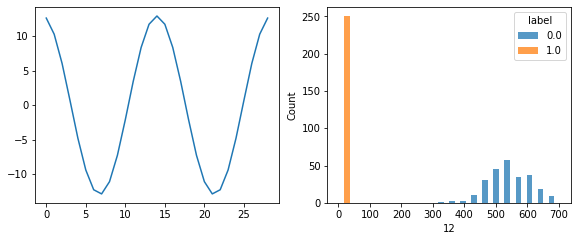

Testing separation for shapelet 13
Accuracy = 0.875
[[169  31]
 [ 19 181]]


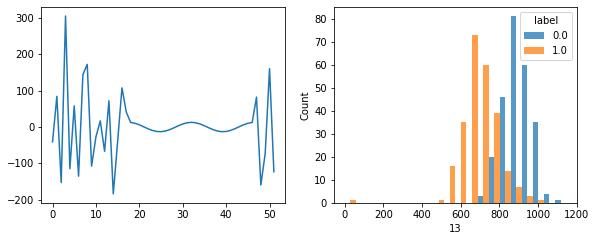

In [16]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_classification_separation(
        D=distances, 
        y=y, 
        d_train=distances_train, 
        d_test=distances_test, 
        shap=shap, 
        shap_id=i,
        plot_sin_y=False
    )

In [17]:
## Manually input sin shapelet

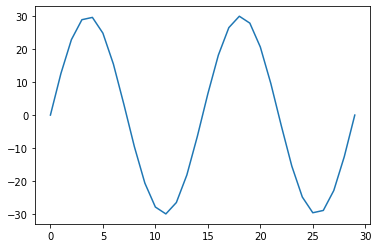

In [18]:
sin_length = 30
t = np.linspace(0, 4*np.pi, sin_length)
sine_wave = 30 * np.sin(t)
plt.plot(sine_wave)

In [19]:
%%time
distances_sin = gendis.transform(X, shapelets=[sine_wave])
dist_sin_train = gendis.transform(X_train, shapelets=[sine_wave])
dist_sin_test = gendis.transform(X_test, shapelets=[sine_wave])

distances_sin['label'] = df['label']

CPU times: user 531 ms, sys: 101 µs, total: 531 ms
Wall time: 529 ms


Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


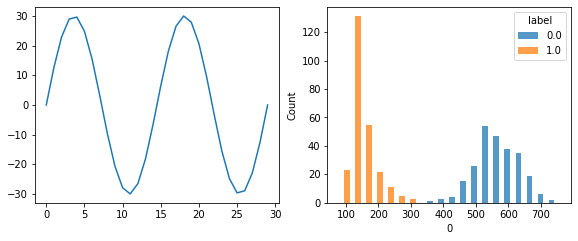

In [20]:
test_classification_separation(
        D=distances_sin, 
        y=y, 
        d_train=dist_sin_train, 
        d_test=dist_sin_test, 
        shap=sine_wave, 
        shap_id=0,
        plot_sin_y=False
    )